In [7]:
from turtle import position
import pyfolio as pf
# This is a sample Python script.
from datetime import datetime
import time

# from src.pairs.pairs_strategy import TradingPair
import yfinance as yf

from src.pairs.pair_strategy import PairStrategy
from src.pairs.coint_functions import *

from src.pairs.portfolio import Portfolio


from src.util.DataFetcher import *

import pandas as pd
import statsmodels.api as sm

from statsmodels.tools.tools import add_constant

import numpy as np


def calculate_daily_returns(asset):
    return asset.pct_change()


def compute_strategy_returns(positions, asset1, asset2, beta):
    asset1_returns = calculate_daily_returns(asset1)
    asset2_returns = calculate_daily_returns(asset2)

        # Print the head of the daily returns DataFrame
    print("Daily returns 1 head:\n", asset1_returns.head())
        # Print the head of the daily returns DataFrame
    print("Daily returns 2 head:\n", asset2_returns.head())

    # Ensure 'Date' is already a datetime column in both asset returns DataFrames
    asset1_returns['Date'] = pd.to_datetime(asset1_returns['Date'], format='%Y-%m-%d')
    asset2_returns['Date'] = pd.to_datetime(asset2_returns['Date'], format='%Y-%m-%d')



    # Set 'Date' as the index
    asset1_returns.set_index('Date', inplace=True)
    asset2_returns.set_index('Date', inplace=True)

    # Align positions with the asset returns based on the index
    positions = positions.reindex(asset1_returns.index).fillna(method='ffill')

    # Calculate the spread return
    spread_return = asset1_returns['Returns'] - beta * asset2_returns['Returns']

    # Calculate daily returns
    daily_returns = positions.shift(1) * spread_return

    # Print the head of the daily returns DataFrame
    print("Daily returns head:\n", daily_returns.head())

    return daily_returns


def spread_zscore(spread, mean=None, sigma=None):
    if (mean != None and sigma != None):
        return (spread - mean) / sigma
    else:
        return (spread - spread.mean()) / np.std(spread)
    


# def compute_strategy_returns(positions, asset1, asset2, beta):
#     # Calculate daily returns for each asset
#     asset1_returns = calculate_daily_returns(asset1)
#     asset2_returns = calculate_daily_returns(asset2)
#     # # Diagnostic print statements
#     # print("Positions head:\n", positions.head())
#     # print("Asset1 returns head:\n", asset1_returns.head())
#     # print("Asset2 returns head:\n", asset2_returns.head())

#     # Calculate daily strategy returns
#     strategy_returns = positions.shift(1) * pd.concat([asset1_returns, asset2_returns], axis=1)
#     daily_returns = strategy_returns.sum(axis=1)

#     spread_return = asset1_returns - beta * asset2_returns


    
#     # Apply the signals to the returns
#     # Multiply the returns by the signals to get the strategy's returns
#     daily_returns= position.shift(1) * spread_return + 0

#     daily_returns['Date'] = pd.to_datetime(daily_returns['Date'], format='%Y-%m-%d')
#     # Now set the 'Date' column as the index of the DataFrame
#     daily_returns.set_index('Date', inplace=True)
#     # # More diagnostic print statements
#     # print("Strategy returns head:\n", strategy_returns.head())
#     print("Daily returns head:\n", daily_returns.head())
# #     daily_returns['date_column'] = pd.to_datetime(daily_returns['Date'], errors='coerce')  # Convert to datetime, coerce errors to NaT

# # Option 1: Fill NaT with a placeholder date (e.g., the earliest date in your series)
# # placeholder_date = df['date_column'].min()
# # df['date_column'].fillna(placeholder_date, inplace=True)

#     # Option 2: Drop rows with NaT values
#     daily_returns.dropna(subset=['date_column'], inplace=True)


    # # More diagnostic print statements
    # print("Strategy returns head:\n", strategy_returns.head())
    print("Daily returns head:\n", daily_returns.head())
    return daily_returns

In [2]:
# Environment info:
!pip freeze

appdirs==1.4.4
appnope==0.1.3
asttokens==2.4.1
beautifulsoup4==4.12.2
Bottleneck==1.3.7
certifi==2023.11.17
charset-normalizer==3.3.2
comm==0.2.1
contourpy==1.2.0
cycler==0.12.1
DateTime==5.4
debugpy==1.8.0
decorator==5.1.1
empyrical-reloaded==0.5.9
exceptiongroup==1.2.0
executing==2.0.1
fonttools==4.47.0
frozendict==2.4.0
html5lib==1.1
hurst==0.0.5
idna==3.6
importlib-metadata==7.0.1
importlib-resources==6.1.1
investpy==1.0.8
ipykernel==6.28.0
ipython==8.18.1
jedi==0.19.1
joblib==1.3.2
jupyter_client==8.6.0
jupyter_core==5.7.1
kiwisolver==1.4.5
lxml==5.1.0
matplotlib==3.8.2
matplotlib-inline==0.1.6
multitasking==0.0.11
nest-asyncio==1.5.8
numpy==1.26.3
packaging==23.2
pandas==2.1.4
pandas-datareader==0.10.0
parso==0.8.3
patsy==0.5.6
peewee==3.17.0
pexpect==4.9.0
pf==0.1.1
pillow==10.2.0
platformdirs==4.1.0
prompt-toolkit==3.0.43
psutil==5.9.7
ptyprocess==0.7.0
pure-eval==0.2.2
pyfolio-reloaded==0.9.5
Pygments==2.17.2
pykalman==0.9.5
pyparsing==3.1.1
python-dateutil==2.8.2
pytz==2023.3

In [3]:
# tickers = ["DPZ", "AAPL", "GOOG", "AMD", "GME", "SPY", "NFLX", "BA", "WMT", "GS", "XOM", "META", "BRK-B", "MSFT", "QQQ"]
tickers = ["BTC-USD", "ETH-USD"]

# tickers = ["MSFT", "QQQ"]

start_date = datetime(2017, 1, 1)
end_date = datetime(2024, 1, 27)
tickData = get_all_adjusted_close_data(start_date, end_date, tickers)

tickData.head(100)


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


,BTC-USD,ETH-USD
Date,,
2017-01-01,998.325012,NaN
2017-01-02,1021.750000,NaN
2017-01-03,1043.839966,NaN
2017-01-04,1154.729980,NaN
2017-01-05,1013.380005,NaN
2017-01-06,902.200989,NaN
2017-01-07,908.585022,NaN
2017-01-08,911.198975,NaN
2017-01-09,902.828003,NaN


In [4]:
tickersEq = ["QQQ", "MSFT", "SPY"]
# benchmark = ["BTC-USD"]

# tickers = ["MSFT", "QQQ"]

start_date = datetime(2017, 1, 1)
end_date = datetime(2024, 1, 27)
tickDataEq = get_all_adjusted_close_data(start_date, end_date, tickers)

# pair = PairStrategy(tickData['BTC-USD'],tickData['ETH-USD'],'2018-01-05','2019-01-04','2018-01-05','2019-01-04')
#incorp 
pair = PairStrategy(tickDataEq['SPY'], tickDataEq['QQQ'],tickDataEq['MSFT'],start_full='2018-01-05',end_full='2019-01-04',start_train='2018-01-05',end_train='2018-10-04', tau_denom=252, trading_fee=0.002)


print(pair.is_valid_pair)
val = pair.run_strategy(z=1.0)
# pair.plot_pair(pair.results)
# pair.plot_results()
# pair.plot_drawdown()

# print(val)

results = pair.results



# results.head(100)

# #with fees
strategy_returns_series = results['net_strategy_returns']

strategy_returns_series

# strategy_returns_series.head(100)

pf.create_simple_tear_sheet(strategy_returns_series)

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


KeyError: 'SPY'

Pair Created (BTC-USD, ETH-USD)
[Train start (2018-01-05) End train (2018-10-04), Full start (2018-01-05) End full (2019-01-04)]
<bound method PairStrategy.is_valid_pair of Pair [ETH-USD, BTC-USD]
	Window: [Train start (2018-01-05) End train (2018-10-04), Full start (2018-01-05) End full (2019-01-04)]
	p-value: 7.848648878283375e-11
	Pair eligible: True>
0.05092229266704477
-0.048349620996980584
{'strat cum P&L': 0.6407, 'cum perf vs bmk': 1.4191, 'strat vol': 41.7448, 'strat sharpe': 1.5396}
   3 Worst DD 3 Worst DD Periods
0   27.580892           115 days
1   23.171921            61 days
2   23.110434            50 days
##################################################
       Rolling DrawDown Stats
count              365.000000
mean                 3.697931
std                  5.146238
min                  0.000000
25%                  0.199800
50%                  1.252095
75%                  5.427174
max                 27.580892
#################################################

Start date,2018-01-05
End date,2019-01-04
Total months,17
,Backtest
Annual return,35.206%
Cumulative returns,54.788%
Annual volatility,34.641%
Sharpe ratio,1.04
Calmar ratio,1.24
Stability,0.46
Max drawdown,-28.283%


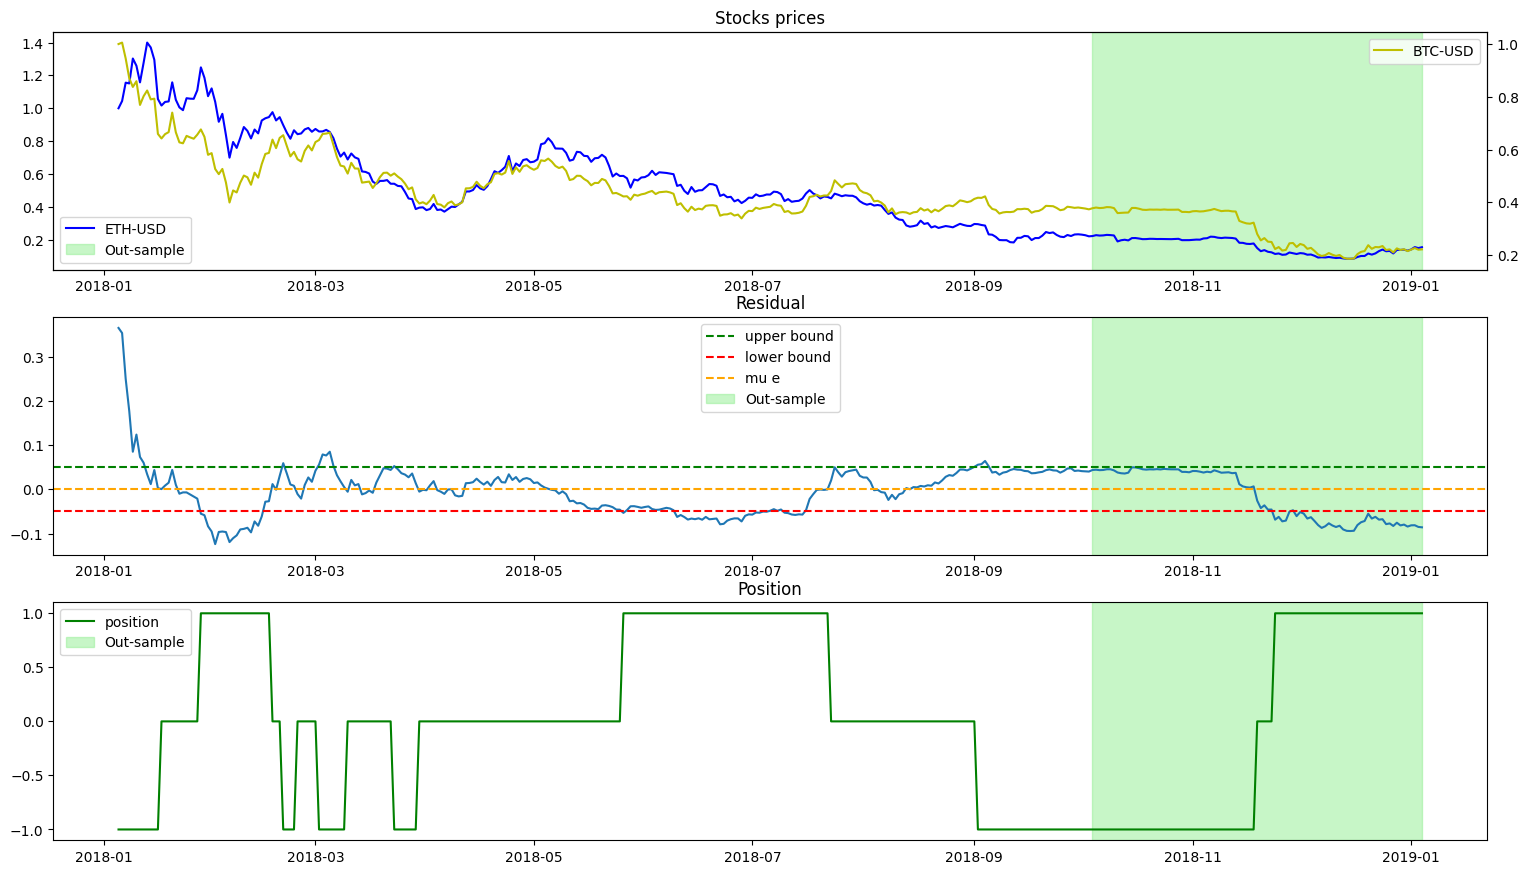

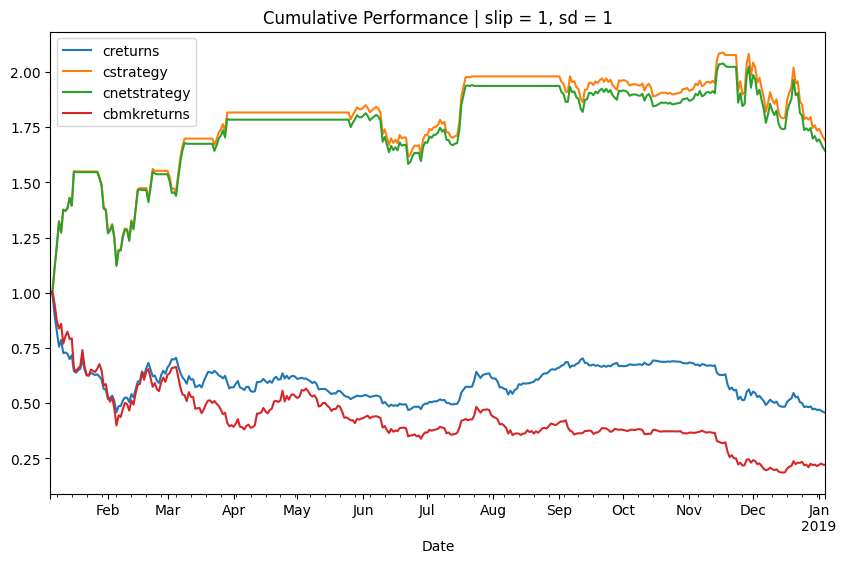

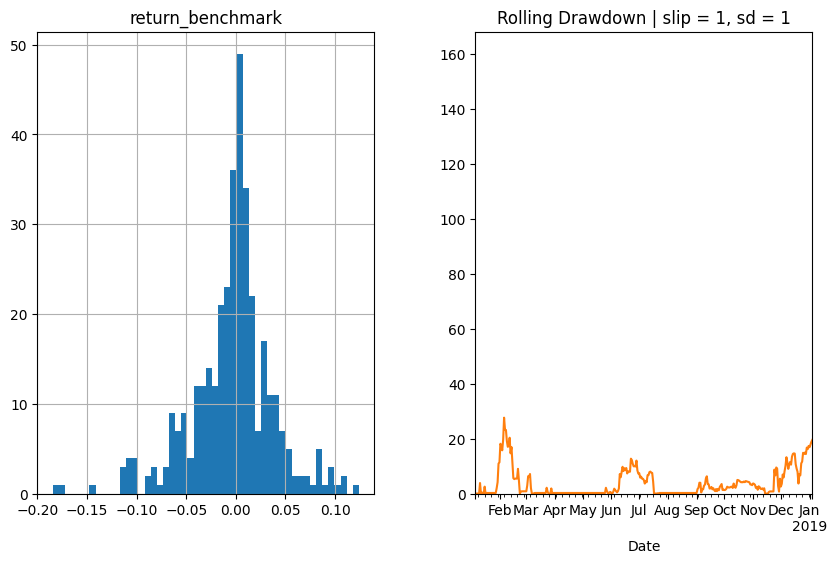

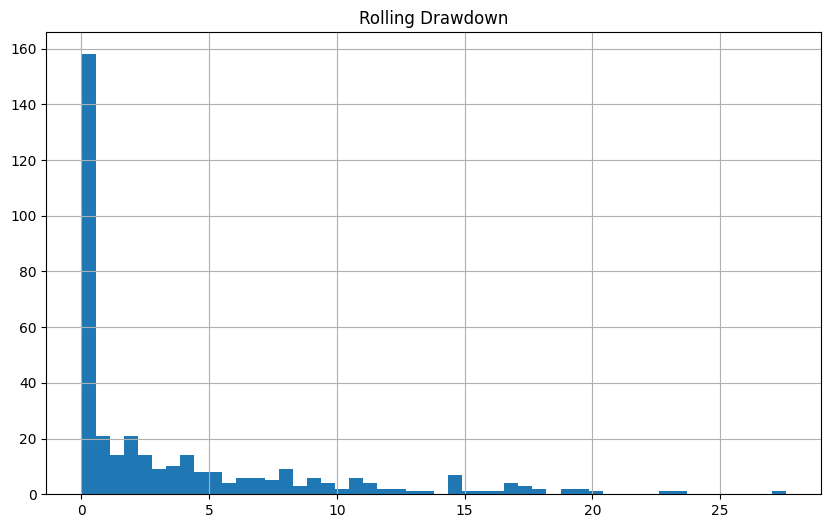

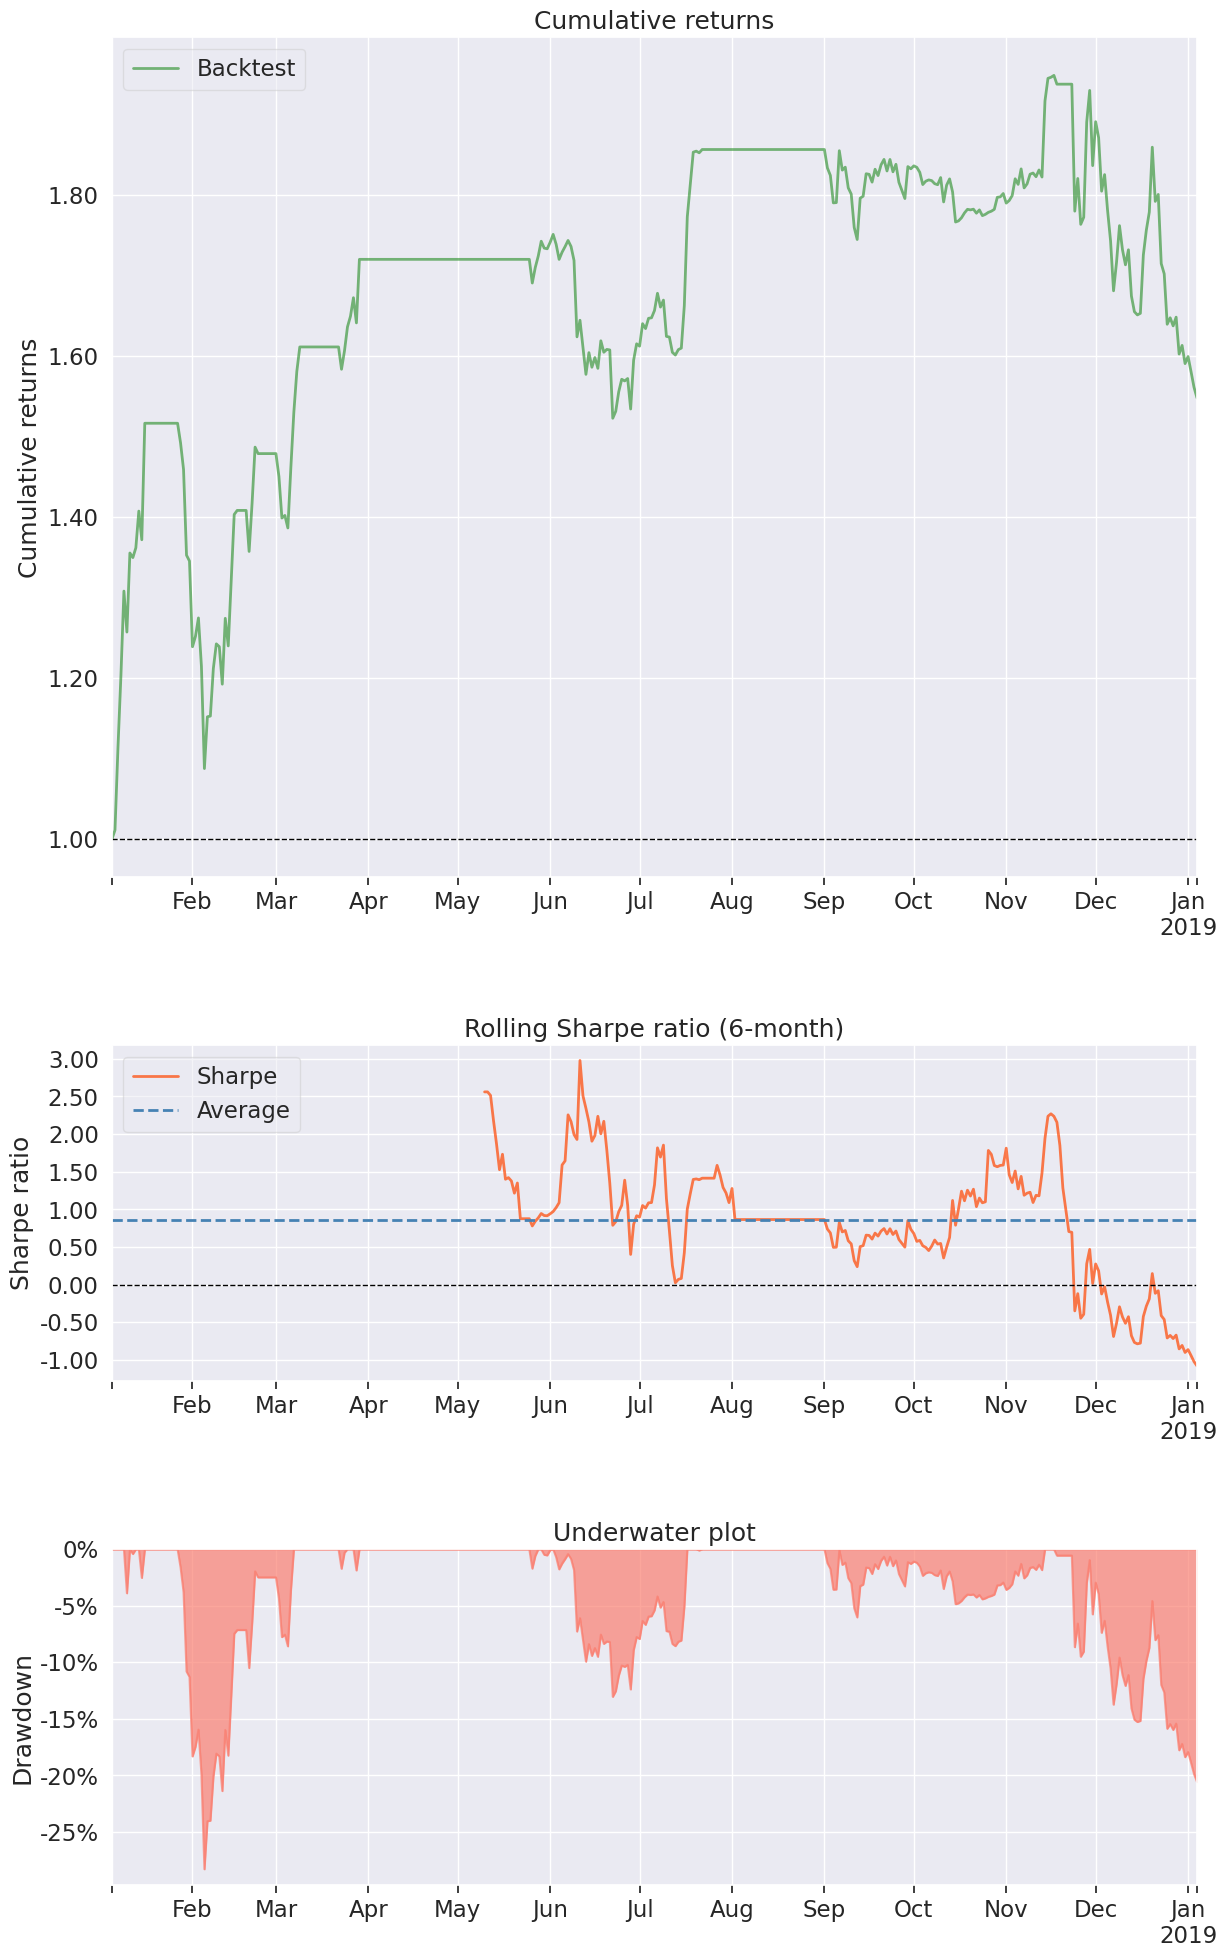

In [6]:
import warnings
warnings.filterwarnings('ignore')
#incorp 
pair = PairStrategy(tickData['BTC-USD'], tickData['BTC-USD'],tickData['ETH-USD'],start_full='2018-01-05',end_full='2019-01-04',start_train='2018-01-05',end_train='2018-10-04', tau_denom=365, trading_fee=0.002)


print(pair.is_valid_pair)
val = pair.run_strategy(z=1.0)
print(val)
pair.plot_pair(pair.results)
pair.plot_results()
pair.plot_drawdown()

# print(val)

results = pair.results

# results.head(100)

# #with fees
strategy_returns_series = results['strategy_returns']

strategy_returns_series


pf.create_simple_tear_sheet(strategy_returns_series)


In [ ]:
start_full='2018-01-05',end_full='2019-01-04',start_train='2018-01-05',end_train='2018-07-04'

IN Sample

In [31]:

# Param Set Up
start_in =  '2018-01-05'
end_in = '2019-01-04'
start = start_in
end = end_in
pair = PairStrategy(tickData['BTC-USD'], tickData['BTC-USD'],tickData['ETH-USD'],start_full=start,end_full=end,start_train=start_in,end_train=end_in, tau_denom=365, trading_fee=0.002)
pair.run_strategy(z=1,slip=1)
# pair.plot_results()

Pair Created (BTC-USD, ETH-USD)
[Train start (2018-01-05) End train (2019-01-04), Full start (2018-01-05) End full (2019-01-04)]
0.05545469511469535
-0.0600449950901083


{'strat cum P&L': 0.4742,
 'cum perf vs bmk': 1.2526,
 'strat vol': 35.2302,
 'strat sharpe': 1.3498}

Out sample

<Axes: xlabel='Date'>

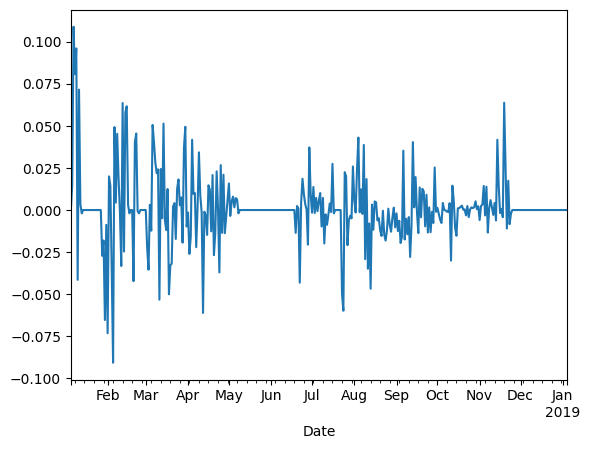

In [18]:
#just compare this with other model - if it matches then good!!!
# pf.create_full_tear_sheet(pair.results['strategy'])

strategy_returns_series.plot()

Z Score calc normalized

Text(0.5, 1.0, 'Spread - Z-Score')

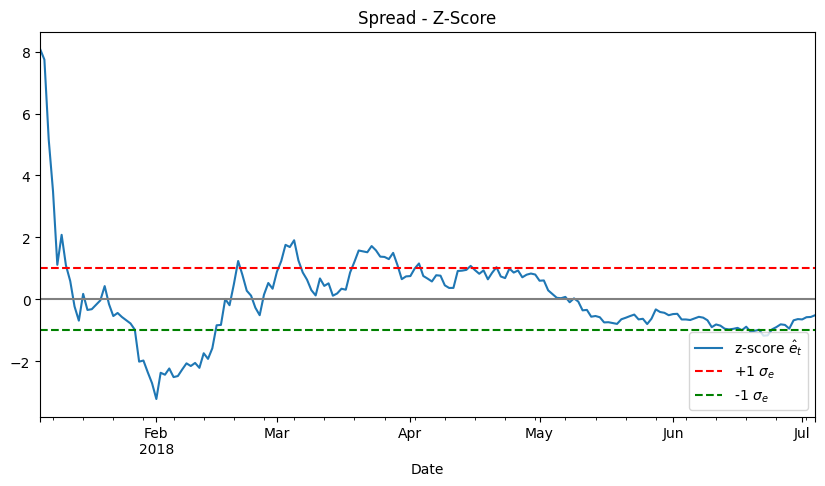

In [17]:
import matplotlib.pyplot as plt
z = spread_zscore(pair.res_calc,pair.OU_PARAMS_DICT['mu_e'], pair.OU_PARAMS_DICT['sigma_eq'])

z.plot(figsize=(10,5))
plt.axhline(1.0, color='red', linestyle='--')
plt.axhline(-1.0, color='green', linestyle='--')
plt.legend(['z-score $\hat{e}_t$', '+1 $\sigma_e$', '-1 $\sigma_e$'], loc='lower right')
plt.axhline(0, color='grey')
plt.title('Spread - Z-Score')


# position = pair.results['position']
# daily_returns = compute_strategy_returns(positions=position, asset1=pair.x_full, asset2=pair.y_full, beta=pair.OU_PARAMS_DICT['b'])
# daily_returns.plot()

# # pf.create_full_tear_sheet(daily_returns)

In [7]:
pair.results.head(100)

,price_y,price_x,full_resid,b,return_y,return_x,return,mu,dist,lower_bound,upper_bound,position,strategy,creturns,cstrategy
Date,,,,,,,,,,,,,,,
2018-01-05,1.0000,1.0000,0.3573,0.4113,0.0000,0.0000,0.0000,-0.002326,0.359626,-0.060228,0.055576,-1.0,0.0000,1.000000,1.000000
2018-01-06,1.0056,1.0441,0.3448,0.4113,0.0056,0.0431,-0.0122,-0.002326,0.347126,-0.060228,0.055576,-1.0,0.0122,0.987874,1.012275
2018-01-07,0.9454,1.1558,0.2386,0.4113,-0.0617,0.1017,-0.1036,-0.002326,0.240926,-0.060228,0.055576,-1.0,0.1036,0.890653,1.122771
2018-01-08,0.8704,1.1512,0.1655,0.4113,-0.0827,-0.0040,-0.0810,-0.002326,0.167826,-0.060228,0.055576,-1.0,0.0810,0.821355,1.217501
2018-01-09,0.8374,1.3027,0.0702,0.4113,-0.0386,0.1237,-0.0895,-0.002326,0.072526,-0.060228,0.055576,-1.0,0.0895,0.751037,1.331492
2018-01-10,0.8591,1.2587,0.1100,0.4113,0.0256,-0.0344,0.0397,-0.002326,0.112326,-0.060228,0.055576,-1.0,-0.0397,0.781453,1.279667
2018-01-11,0.7691,1.1576,0.0616,0.4113,-0.1106,-0.0837,-0.0761,-0.002326,0.063926,-0.060228,0.055576,-1.0,0.0761,0.724191,1.380851
2018-01-12,0.8021,1.2761,0.0458,0.4113,0.0420,0.0975,0.0019,-0.002326,0.048126,-0.060228,0.055576,-1.0,-0.0019,0.725568,1.378230
2018-01-13,0.8239,1.3996,0.0168,0.4113,0.0268,0.0924,-0.0112,-0.002326,0.019126,-0.060228,0.055576,-1.0,0.0112,0.717487,1.393753



Pyfolio, a Python library for performance and risk analysis of financial portfolios, primarily expects returns as input in the form of simple returns, not log returns. This is because most of Pyfolio's functions and metrics are designed to work with simple returns. However, it's relatively straightforward to convert log returns to simple returns if you have your data in log returns format.

In [7]:
import pyfolio as pf
import pandas as pd
import numpy as np
import yfinance as yf

# Load historical data for a stock (e.g., Apple Inc.)
stock_data = yf.download('QQQ', start='2019-01-01', end='2021-12-31')

# Calculate daily returns
stock_data['returns'] = stock_data['Adj Close'].pct_change()


# ret_log = np.log(stock_data['Adj Close'] / stock_data['Adj Close'].shift(1)).fillna(0)

# Assume a simple buy and hold strategy
strategy_returns = stock_data['returns']
# strategy_returns
# ret_log
# # Create a benchmark (e.g., S&P 500)
# benchmark_data = yf.download('^GSPC', start='2019-01-01', end='2021-12-31')
# benchmark_returns = benchmark_data['Adj Close'].pct_change()

# # Create a tear sheet for the strategy
# strategy_returns
# pf.create_simple_tear_sheet(pair.results['net_strategy'])

[*********************100%%**********************]  1 of 1 completed
